<a href="https://colab.research.google.com/github/armand010/PembMesin_Ganjil_2024/blob/main/Week4_Praktikum1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Klasifikasi SVM dengan Data Dummy

In [1]:
# import library
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

Pada kegiatan ini, model yang digunakan adalah sebuah model yang sederhana berupa generative model untuk menentukan label pada poin baru. Kasus pada data dummy ini memperlihatkan dua kelas yang telah terpisah.

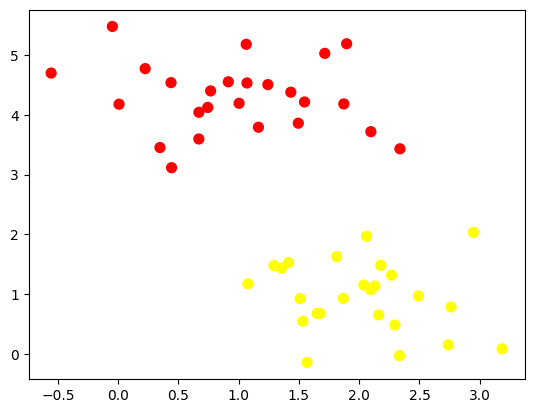

In [2]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

# Kode ini menghasilkan plot sebaran data sintetik yang berisi dua klaster yang berbeda.

---
### Penjelasan:

1. "X, y = make_blobs(n_samples=50, centers=2, random_state=0, cluster_std=0.60)"
    - X: Data koordinat untuk tiap titik (fitur).
    - y: Label klaster yang sesuai untuk setiap titik (0 atau 1).
    - "n_samples=50": Menghasilkan 50 sampel data.
    - "centers=2": Menghasilkan dua klaster pusat (artinya data akan terdistribusi dalam dua grup).
    - "random_state=0": Menentukan seed untuk pengacakan, sehingga hasilnya konsisten setiap kali kode dijalankan.
    - "cluster_std=0.60": Mengatur standar deviasi atau tingkat sebaran dari tiap klaster. Nilai yang lebih tinggi membuat klaster lebih tersebar.

2. "plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')"
    - plt.scatter(): Fungsi ini digunakan untuk membuat plot scatter (sebaran) data.
    - X[:, 0]: Mengambil nilai pada kolom pertama dari X sebagai koordinat sumbu x.
    - X[:, 1]: Mengambil nilai pada kolom kedua dari X sebagai koordinat sumbu y.
    - c=y: Menggunakan label y untuk memberi warna berbeda ke masing-masing klaster (0 dan 1).
    - s=50: Ukuran titik scatter.
    - cmap='autumn': Skema warna yang digunakan untuk membedakan klaster, diambil dari colormap autumn.
---

Untuk membuat sebuah model klasifikasi, garis pemisah data dari dua buah himpunan yang terbentuk diperlukan. Namun, kondisi ini masih menyisakan kasus dimana garis pemisah yang dibutuhkan lebih dari satu garis.

(-1.0, 3.5)

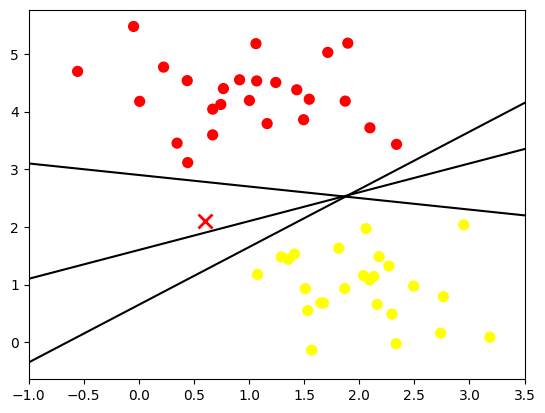

In [3]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plt.plot([0.6], [2.1], 'x', color='red', markeredgewidth=2, markersize=10)

for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(xfit, m * xfit + b, '-k')

plt.xlim(-1, 3.5)

# Kode ini menampilkan dataset dalam bentuk plot sebaran,
# menandai satu titik khusus (0.6, 2.1) dengan simbol 'x' merah,
# dan memplot tiga garis lurus dengan berbagai kemiringan dan
# intersep untuk menunjukkan model linear di atas data.

---
### Penjelasan:
1. "xfit = np.linspace(-1, 3.5)"
    - np.linspace(-1, 3.5): Membuat array yang berisi titik-titik yang tersebar secara merata antara -1 dan 3.5. Ini digunakan sebagai sumbu x untuk memplot beberapa garis lurus. Array ini akan memiliki nilai-nilai yang akan dipakai sebagai masukan ke persamaan garis.
2. "plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')"
    - Sama seperti sebelumnya, ini adalah plot sebaran yang menunjukkan titik-titik dari dataset X dengan warna yang berbeda berdasarkan label klaster y, ukuran titik adalah 50, dan menggunakan skema warna autumn.
3. "plt.plot([0.6], [2.1], 'x', color='red', markeredgewidth=2, markersize=10)"
    - plt.plot(): Fungsi ini digunakan untuk memplot simbol pada plot. Dalam hal ini, dipetakan sebuah titik dengan koordinat (0.6, 2.1) menggunakan simbol 'x'.
    - color='red': Warna dari simbol adalah merah.
    - markeredgewidth=2: Lebar tepi simbol adalah 2.
    - markersize=10: Ukuran simbol adalah 10.
    
  Jadi, titik (0.6, 2.1) ditandai dengan simbol 'x' merah pada plot.

4. "for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:"
    - Ini adalah loop yang mengiterasi melalui tiga pasangan nilai m (gradien/kemiringan) dan b (intersep) untuk memplot tiga garis lurus dengan persamaan y = mx + b.
    - Di dalam loop, digunakan "plt.plot(xfit, m * xfit + b, '-k')" untuk memplot garis dengan gradien m dan intersep b.

        - xfit adalah nilai sumbu x (dari np.linspace).
        - m * xfit + b: Persamaan garis yang dihasilkan dengan kemiringan m dan intersep b.
        - '-k': Gaya garis adalah garis lurus dengan warna hitam ('-k' di mana 'k' adalah singkatan untuk warna hitam di matplotlib).
    
  Ini berarti tiga garis akan dipetakan dengan kemiringan dan intersep yang berbeda:
    
    Garis pertama: y = 1x + 0.65
    
    Garis kedua: y = 0.5x + 1.6
    
    Garis ketiga: y = -0.2x + 2.9

    tes
5. "plt.xlim(-1, 3.5)"
    - Ini mengatur batasan sumbu x pada plot, dengan nilai minimum -1 dan maksimum 3.5.
---

Banyaknya garis pemisah menunjukkan bahwa muncul beberapa kemungkinan suatu data baru masuk dalam kategori tertentu. Sebuah data baru 'x' dimunculkan pada posisi yang berbeda dengan data pada dua himpunan lain sehingga data baru ini tidak masuk ke dalam kategori dua himpunan sebelumnya.

Margin dalam suatu garis juga dapat digunakan untuk memperjelas posisi sebuah data terhadap label.

(-1.0, 3.5)

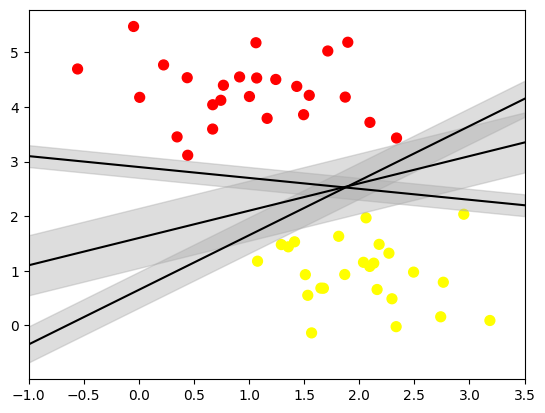

In [4]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none',
                     color='#AAAAAA', alpha=0.4)

plt.xlim(-1, 3.5)

# Kode ini memplot dataset klaster sebagai titik-titik,
# menampilkan tiga garis lurus dengan kemiringan dan intersep yang berbeda,
# dan menambahkan area bayangan abu-abu di sekitar setiap garis untuk
# menunjukkan margin atau deviasi ketidakpastian.
# Area yang diisi ini membantu memvisualisasikan batas toleransi di sekitar setiap model linear.


Margin yang digunakan pada SVM berfungsi untuk menunjukkan model yang paling optimal. Kriteria optimal ini diperoleh dari penentuan garis mana yang mampu memaksimalkan margin yang ada.

---
### Penjelasan:
  1. "xfit = np.linspace(-1, 3.5)"\
    - np.linspace(-1, 3.5): Membuat array yang berisi titik-titik yang tersebar secara merata antara -1 dan 3.5. Ini digunakan sebagai sumbu x untuk memplot beberapa garis lurus.
  2. "plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')"
    - Ini memplot titik-titik data dari dataset X menggunakan warna yang berbeda berdasarkan label klaster y, dengan ukuran titik 50, dan colormap autumn.
  3. "for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]"
    - Ini adalah loop yang mengiterasi melalui tiga pasangan nilai m (gradien/kemiringan), b (intersep), dan d (nilai deviasi/margin).
      - m: Gradien/kemiringan garis.
      - b: Intersep atau titik di mana garis memotong sumbu y.
      - d: Margin yang akan digunakan untuk membuat area bayangan di sekitar garis.
  4. Loop
    - yfit = m * xfit + b: Menghitung nilai y untuk setiap nilai x pada xfit, menggunakan persamaan garis lurus y = mx + b.
      - m * xfit + b: Persamaan garis lurus dengan kemiringan m dan intersep b.
    - plt.plot(xfit, yfit, '-k'): Memplot garis lurus tersebut dengan warna hitam ('-k').
    - plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none', color='#AAAAAA', alpha=0.4):
      - fill_between(): Mengisi area antara dua garis.
      - xfit: Sumbu x.
      - yfit - d dan yfit + d: Dua batasan pada sumbu y yang akan menciptakan margin di atas dan di bawah garis lurus.
      - edgecolor='none': Tidak ada tepi di area yang diisi.
      - color='#AAAAAA': Warna abu-abu untuk area yang diisi.
      - alpha=0.4: Transparansi area yang diisi (dengan nilai 0.4, sehingga area terlihat semi-transparan).
  
  
  Ini membuat area bayangan abu-abu di sekitar garis lurus untuk menampilkan margin ketidakpastian atau deviasi d di atas dan di bawah garis.
  
  5. plt.xlim(-1, 3.5)
    - Mengatur batasan sumbu x dari -1 hingga 3.5.
---

## Penerapan fitting SVM

In [5]:
from sklearn.svm import SVC # "Support vector classifier"
model = SVC(kernel='linear', C=1E10)
model.fit(X, y)

SVC(C=10000000000.0, kernel='linear')

In [6]:
# buat sebuah fungsi untuk menampilkan fitting data

def plot_svc_decision_function(model, ax=None, plot_support=True):

    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # buat grid untuk evaluasi model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    # plot batas dan margin
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

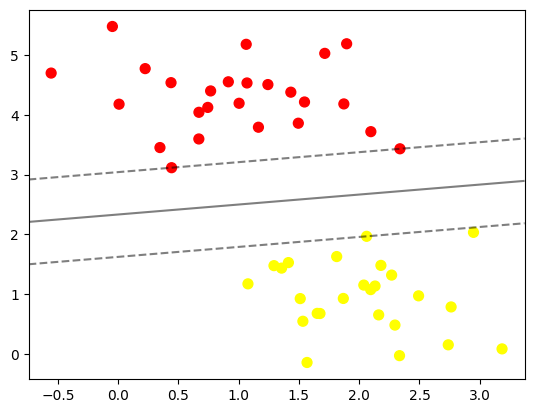

In [7]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model)

beberapa titik data yang menyentuh (masuk ke area) garis disebut sebagai support vector.

In [8]:
# untuk mengetahui data yang masuk ke dalam support vector dapat dilakukan dengan memanggil support_vectors_

model.support_vectors_

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])

Hasil fitting merupakan kunci keberhasilan suatu classifier (yang hanya dilihat dari posisi dari support vector). Data-data lain yang berada jauh dari margin dan tetap berada di area yang tepat tidak memiliki kemampuan untuk memodifikasi fitting (karena bukan support vector). Data-data tersebut tidak berkontribusi terhadap loss function yang digunakan untuk fitting model. Untuk lebih memahami hal ini, 60 dan 120 data awal digunakan sebagai contoh dalam bentuk perbandingan.

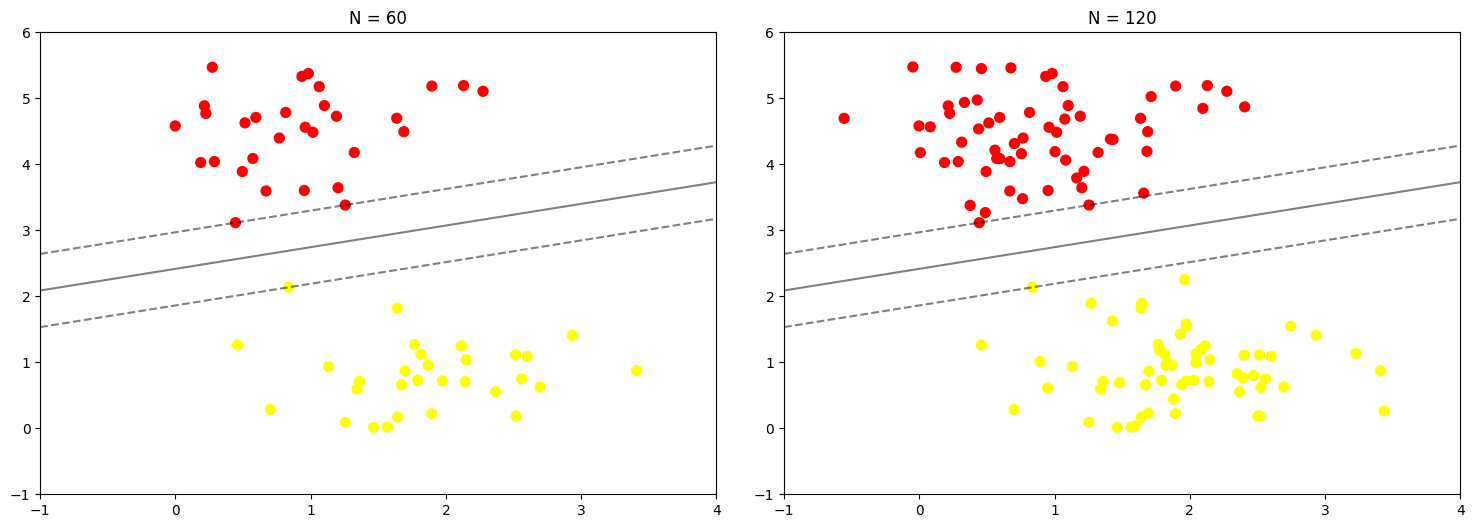

In [9]:
def plot_svm(N=10, ax=None):
    X, y = make_blobs(n_samples=200, centers=2,
                      random_state=0, cluster_std=0.60)
    X = X[:N]
    y = y[:N]
    model = SVC(kernel='linear', C=1E10)
    model.fit(X, y)

    ax = ax or plt.gca()
    ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    ax.set_xlim(-1, 4)
    ax.set_ylim(-1, 6)
    plot_svc_decision_function(model, ax)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
for axi, N in zip(ax, [60, 120]):
    plot_svm(N, axi)
    axi.set_title('N = {0}'.format(N))

## Data Tidak Terpisah Secara Linier

Data yang terpisah secara tidak linier menjadi masalah pada model SVM. Oleh karena itu, kernel menjadi sebuah kebutuhan bagi SVM untuk melakukan fitting pada hubungan nonlinier dengan sebuah classifier linier.

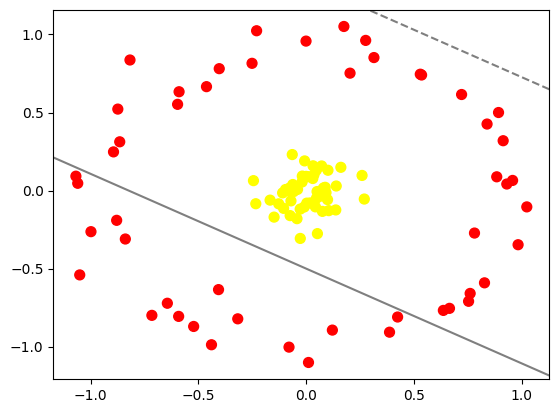

In [12]:
# contoh data tidak terpisah secara linier

from sklearn.datasets import make_circles
X, y = make_circles(100, factor=.1, noise=.1)

clf = SVC(kernel='linear').fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf, plot_support=False);

Berdasarkan contoh data di atas, tidak ditemukan sebuah garis pemisah linier yang mampu berperan sebagai pemisah data. Oleh karena itu, proyeksi (sudut pandang) lain terhadap data diperlukan supaya data dapat terpisahkan dengan jelas. Pada kegiatan ini, proyeksi yang digunakan adalah proyeksi berbasis radial.

In [13]:
r = np.exp(-(X ** 2).sum(1))

Karena proyeksi radial tidak cukup menggunakan model 2D, maka plot visualisasi diubah menjadi model 3D.

interactive(children=(Dropdown(description='elev', index=2, options=(-90, 45, 30, 20, 10), value=30), IntSlide…

<function __main__.plot_3D(elev=30, azim=30, X=array([[ 1.38985003e-01,  2.89867633e-02],
       [ 9.15080152e-02, -1.32628926e-02],
       [-1.05952734e+00,  4.64234770e-02],
       [ 3.15488574e-02,  1.58416375e-01],
       [ 6.35726399e-01, -7.68281522e-01],
       [-9.33545438e-03, -1.05475937e-01],
       [ 5.17380833e-02, -2.76141158e-01],
       [ 1.36841699e-01, -1.24445125e-01],
       [-5.83863469e-02, -6.70700967e-03],
       [-4.03438096e-01,  7.80912955e-01],
       [ 9.87515104e-02, -5.83602874e-02],
       [-5.22018624e-01, -8.71142515e-01],
       [ 7.20210483e-01,  6.15310441e-01],
       [-8.38842773e-01, -3.10722406e-01],
       [ 6.43804546e-02, -3.42352434e-03],
       [-2.33958901e-01, -8.46720262e-02],
       [-7.60233705e-03,  1.89836036e-01],
       [ 1.04255887e-01, -1.28916590e-01],
       [-9.98209203e-01, -2.63653666e-01],
       [-1.93812164e-02,  5.47069450e-02],
       [-7.09617412e-02, -6.64332374e-02],
       [-4.06689178e-01, -6.35002659e-01],
       [ 6.39851550e-03,  8.87338539e-02],
       [-2.44809519e-01,  6.33177267e-02],
       [ 8.77664002e-02,  2.06313300e-02],
       [ 3.86119860e-01, -9.07857852e-01],
       [-7.99612874e-02, -1.00366505e+00],
       [ 5.00723793e-02, -6.57437684e-03],
       [-2.82180194e-02, -1.19118616e-01],
       [ 1.60448581e-01,  1.48794361e-01],
       [-5.91610057e-01, -8.06589422e-01],
       [ 4.69463659e-02, -5.02054211e-02],
       [-8.79065187e-01, -1.90949633e-01],
       [-7.15794397e-01, -7.99987433e-01],
       [-6.49703285e-02,  2.30445937e-01],
       [ 2.44179854e-03, -8.07962699e-02],
       [ 4.25130551e-02, -1.04716292e-01],
       [-1.06808071e+00,  9.19015620e-02],
       [-3.17577950e-01, -8.22237808e-01],
       [ 8.26453722e-01, -5.91580110e-01],
       [-8.17320263e-01,  8.36517681e-01],
       [-2.30198746e-01,  1.02393319e+00],
       [ 8.91520568e-01,  4.99933029e-01],
       [ 6.64104546e-01, -7.55041678e-01],
       [ 9.82160357e-01, -3.47337553e-01],
       [ 5.28686019e-01,  7.45396387e-01],
       [ 1.04085587e-02, -1.10197049e+00],
       [-7.10566102e-02, -9.32912878e-03],
       [-1.83966531e-02,  9.26278288e-02],
       [ 2.02972320e-01,  7.52150072e-01],
       [-1.04953571e-01, -1.14241726e-01],
       [ 7.80037236e-01, -2.72554117e-01],
       [ 9.12950210e-01,  3.19151050e-01],
       [ 1.00608491e-01,  1.29965864e-01],
       [ 2.69115092e-01, -5.46025509e-02],
       [-2.77054121e-02, -3.07024121e-01],
       [ 7.49221598e-02, -1.33639972e-01],
       [ 7.59899158e-01, -6.59464176e-01],
       [-8.73666691e-01,  5.21847287e-01],
       [ 4.68138798e-02,  1.30436118e-01],
       [ 7.52634586e-01, -7.09846500e-01],
       [ 3.02299214e-02,  7.70912299e-02],
       [-1.06442883e-03,  9.57585951e-01],
       [-5.89678477e-01,  6.33068362e-01],
       [ 4.23561289e-01, -8.10627318e-01],
       [-4.03723611e-02,  7.29925172e-03],
       [-6.44045854e-01, -7.22428860e-01],
       [ 7.16826752e-02, -3.54085626e-02],
       [-4.39378381e-01, -9.88398583e-01],
       [-9.61526896e-02,  6.40774046e-03],
       [ 3.13861564e-01,  8.52121511e-01],
       [-1.49120419e-01, -1.70484083e-01],
       [ 1.78955511e-02, -7.95439048e-02],
       [ 9.29842265e-01,  4.17275563e-02],
       [-1.27723023e-01, -8.52855937e-02],
       [ 7.12858184e-02,  1.57431458e-01],
       [-7.47097028e-02, -1.60876303e-01],
       [-4.62528010e-01,  6.65636796e-01],
       [-7.70864964e-02,  1.63011868e-02],
       [ 5.34712698e-01,  7.40293658e-01],
       [-1.67689688e-01, -6.15737088e-02],
       [ 1.21088460e-01, -8.94477885e-01],
       [ 8.03427224e-02,  1.66592842e-02],
       [-1.05026473e+00, -5.40732863e-01],
       [ 2.75563124e-01,  9.62084522e-01],
       [-1.09587259e-01, -1.51381619e-02],
       [ 1.02257185e+00, -1.04877893e-01],
       [ 8.83204750e-01,  8.79045728e-02],
       [-6.23720788e-02,  3.85013422e-02],
       [ 1.74520174e-01,  1.05130547e+00],
       [ 8.38310884e-01,  4.26032756e-01],
       [-2.51372720e-01,  8.15228490e-01

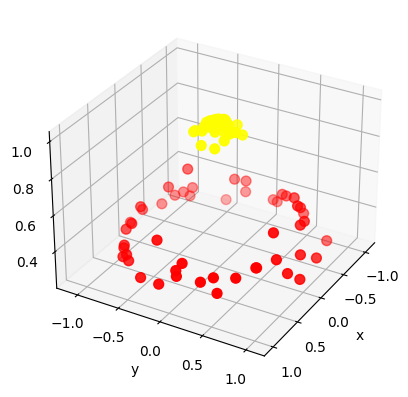

In [15]:
from mpl_toolkits import mplot3d
from ipywidgets import interact, fixed

def plot_3D(elev=30, azim=30, X=X, y=y):
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='autumn')
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('r')

interact(plot_3D, elev=[-90, 45, 30, 20 , 10], azip=(-180, 180),X=fixed(X), y=fixed(y))

walaupun data dapat ditampilkan secara terpisah. Proyeksi titik data sejumlah N ke dalan suatu dimensi N menyebabkan beban komputasi juga bertambah. Untuk mengatasi hal ini, kernel radial basis function (RBF) pada Scikit-Learn digunakan.

In [16]:
clf = SVC(kernel='rbf', C=1E6)
clf.fit(X, y)

SVC(C=1000000.0)

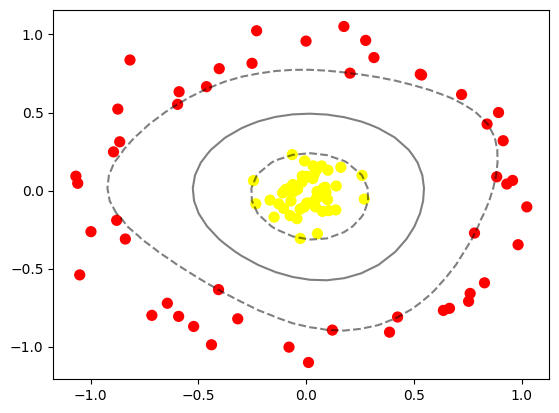

In [17]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=300, lw=1, facecolors='none')

## Data Overlap

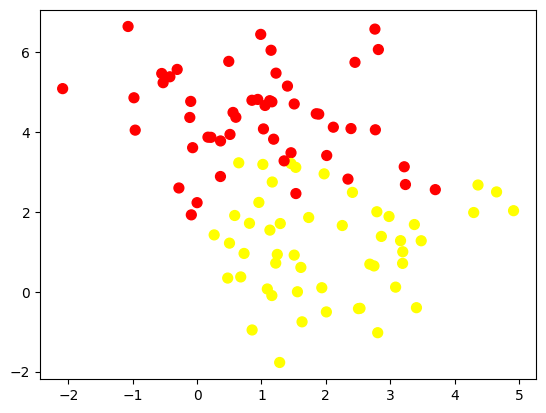

In [18]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=1.2)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');

untuk mengatasi hal ini, teknik penghalusan margin pada SVM dapat diterapkan. Teknik ini berfungsi untuk memasukkan beberapa titik data ke dalam margin supaya menghasilkan fitting yang lebih baik. Penebalan margin dari hasil teknik penghalusan dikelola oleh sebuah parameter tuning (dikenal sebagai C). Contoh dibawah menunjukkan perubahan pada C berdampak pada hasil fitting final.

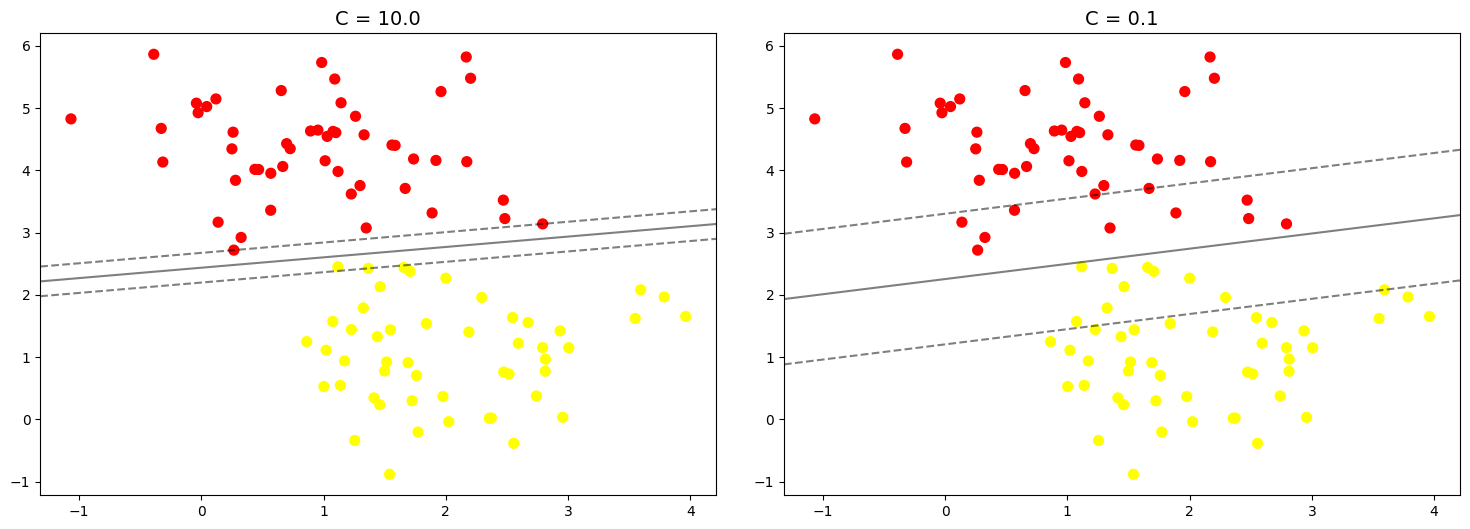

In [19]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=0.8)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for axi, C in zip(ax, [10.0, 0.1]):
    model = SVC(kernel='linear', C=C).fit(X, y)
    axi.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    plot_svc_decision_function(model, axi)
    axi.scatter(model.support_vectors_[:, 0],
                model.support_vectors_[:, 1],
                s=300, lw=1, facecolors='none');
    axi.set_title('C = {0:.1f}'.format(C), size=14)